In [1]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [2]:
# Leemos el archivo "FlujosVid18.csv" con la siguiente función para empezar a trabajar.
dff = pd.DataFrame( pd.read_csv("FlujosVid18.csv", engine="python" ) )

In [3]:
# Leemos el archivo "MeteoVid18" con la siguiente función para empezar a trabajar.
dfm = pd.DataFrame( pd.read_csv("MeteoVid18.csv", engine="python" ) )
#dfm.head()

In [4]:
dfm['Latitud (ºN)'] = "28º 55.117'"
dfm['Longitud (ºO)'] = "111º 18.638'"
dfm['Elevacion (m)'] = "101"

In [5]:
#Se eliminan las columnas innecesarias para el análisis (Unnamed)
dfm.drop( dfm.columns[19:35], axis=1, inplace=True )
dfm.drop( dfm.columns[2:15], axis=1, inplace=True )
dfm.head()

,Date,Time,Rn_Avg,AirTC_Avg,RH,WS_ms_S_WVT,Latitud (ºN),Longitud (ºO),Elevacion (m)
0,06/01/2018,17:00:00,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101
1,06/01/2018,17:30:00,-18.59,26.57,25.25,3.12,28º 55.117',111º 18.638',101
2,06/01/2018,18:00:00,-35.10,25.01,26.45,2.54,28º 55.117',111º 18.638',101
3,06/01/2018,18:30:00,-40.13,23.65,29.22,2.01,28º 55.117',111º 18.638',101
4,06/01/2018,19:00:00,-39.46,22.84,31.08,2.14,28º 55.117',111º 18.638',101


In [6]:
#Se crea una nueva columna "FECHA" a partir de las columnas "DATE" y "TIME"
dfm["Fecha"] = dfm["Date"] + " "+ dfm["Time"]
#Se eliminan las columnas "DATE" y "TIME"
dfm.drop( ["Date","Time"], axis=1, inplace=True )
dfm.head()

,Rn_Avg,AirTC_Avg,RH,WS_ms_S_WVT,Latitud (ºN),Longitud (ºO),Elevacion (m),Fecha
0,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101,06/01/2018 17:00:00
1,-18.59,26.57,25.25,3.12,28º 55.117',111º 18.638',101,06/01/2018 17:30:00
2,-35.10,25.01,26.45,2.54,28º 55.117',111º 18.638',101,06/01/2018 18:00:00
3,-40.13,23.65,29.22,2.01,28º 55.117',111º 18.638',101,06/01/2018 18:30:00
4,-39.46,22.84,31.08,2.14,28º 55.117',111º 18.638',101,06/01/2018 19:00:00


In [7]:
dfm.rename(columns={'AirTC_Avg':'TempA'}, inplace=True)
dfm.rename(columns={'RH':'RelHumidity'}, inplace=True)
dfm.rename(columns={'WS_ms_S_WVT':'VelWind'}, inplace=True)
dfm.rename(columns={'Rn_Avg':'Rad'}, inplace=True)
dfm.dtypes

Rad              float64
TempA            float64
RelHumidity      float64
VelWind          float64
Latitud (ºN)      object
Longitud (ºO)     object
Elevacion (m)     object
Fecha             object
dtype: object

In [8]:
# Cambiamos TIMESTAMP a variable de tiempo.
dfm['Fecha'] = pd.to_datetime(dfm.apply(lambda x: x['Fecha'], 1), dayfirst=True)

In [9]:
# Primero creamos una columna nueva para tener los meses y días de cada año
dfm['Mes'] = dfm['Fecha'].dt.month
dfm['Año'] = dfm['Fecha'].dt.year
dfm['Día'] = dfm['Fecha'].dt.day
dfm['Hora'] = dfm ['Fecha'].dt.hour
dfm.head()

,Rad,TempA,RelHumidity,VelWind,Latitud (ºN),Longitud (ºO),Elevacion (m),Fecha,Mes,Año,Día,Hora
0,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0
1,-18.59,26.57,25.25,3.12,28º 55.117',111º 18.638',101,2018-01-06 17:30:00,1.0,2018.0,6.0,17.0
2,-35.10,25.01,26.45,2.54,28º 55.117',111º 18.638',101,2018-01-06 18:00:00,1.0,2018.0,6.0,18.0
3,-40.13,23.65,29.22,2.01,28º 55.117',111º 18.638',101,2018-01-06 18:30:00,1.0,2018.0,6.0,18.0
4,-39.46,22.84,31.08,2.14,28º 55.117',111º 18.638',101,2018-01-06 19:00:00,1.0,2018.0,6.0,19.0


In [10]:
# Agrupamos la Temperatura por Año y Mes, y así sacamos el máximo y mínimo mensuales.
dfm['VelWindmean'] = dfm.groupby(['Mes'])['VelWind'].transform('mean')
dfm['Tmax'] = dfm.groupby(['Mes'])['TempA'].transform('max')
dfm['Tmin'] = dfm.groupby(['Mes'])['TempA'].transform('min')
dfm['RHmax'] = dfm.groupby(['Mes'])['RelHumidity'].transform('max')
dfm['RHmin'] = dfm.groupby(['Mes'])['RelHumidity'].transform('min')

dfm['RHmean'] = dfm.groupby(['Mes'])['RelHumidity'].transform('mean')

dfm['RadNet'] = dfm.groupby(['Mes'])['Rad'].transform('mean')
dfm["Mes"]=dfm.Mes
dfm["Año"]=dfm.Año
dfm['Día']=dfm.Día
dfm['Hora']=dfm.Hora
dfm.head()

,Rad,TempA,RelHumidity,VelWind,Latitud (ºN),Longitud (ºO),Elevacion (m),Fecha,Mes,Año,Día,Hora,VelWindmean,Tmax,Tmin,RHmax,RHmin,RHmean,RadNet
0,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,1.943827,33.35,0.54,91.6,5.98,38.471432,34.734815
1,-18.59,26.57,25.25,3.12,28º 55.117',111º 18.638',101,2018-01-06 17:30:00,1.0,2018.0,6.0,17.0,1.943827,33.35,0.54,91.6,5.98,38.471432,34.734815
2,-35.10,25.01,26.45,2.54,28º 55.117',111º 18.638',101,2018-01-06 18:00:00,1.0,2018.0,6.0,18.0,1.943827,33.35,0.54,91.6,5.98,38.471432,34.734815
3,-40.13,23.65,29.22,2.01,28º 55.117',111º 18.638',101,2018-01-06 18:30:00,1.0,2018.0,6.0,18.0,1.943827,33.35,0.54,91.6,5.98,38.471432,34.734815
4,-39.46,22.84,31.08,2.14,28º 55.117',111º 18.638',101,2018-01-06 19:00:00,1.0,2018.0,6.0,19.0,1.943827,33.35,0.54,91.6,5.98,38.471432,34.734815


In [11]:
df = dfm.drop_duplicates(dfm.columns[dfm.columns.isin(['Mes'])])
df.head()

,Rad,TempA,RelHumidity,VelWind,Latitud (ºN),Longitud (ºO),Elevacion (m),Fecha,Mes,Año,Día,Hora,VelWindmean,Tmax,Tmin,RHmax,RHmin,RHmean,RadNet
0,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,1.943827,33.35,0.54,91.60,5.98,38.471432,34.734815
1214,-58.85,12.15,51.79,2.18,28º 55.117',111º 18.638',101,2018-02-01 00:00:00,2.0,2018.0,1.0,0.0,1.964189,31.47,0.07,99.53,6.76,48.168006,56.250350
2558,-67.72,9.88,61.63,1.44,28º 55.117',111º 18.638',101,2018-03-01 00:00:00,3.0,2018.0,1.0,0.0,1.926196,35.22,3.06,89.73,6.76,36.968353,92.894913
4046,-60.21,13.00,53.70,1.11,28º 55.117',111º 18.638',101,2018-04-01 00:00:00,4.0,2018.0,1.0,0.0,2.101812,36.30,5.43,93.40,5.23,40.785667,134.012965
5486,-74.48,16.45,64.43,1.62,28º 55.117',111º 18.638',101,2018-05-01 00:00:00,5.0,2018.0,1.0,0.0,2.113918,38.18,7.13,94.60,8.19,44.233468,162.405343


In [15]:
df.head(12)

,Rad,TempA,RelHumidity,VelWind,Latitud (ºN),Longitud (ºO),Elevacion (m),Fecha,Mes,Año,Día,Hora,VelWindmean,Tmax,Tmin,RHmax,RHmin,RHmean,RadNet
0,1.79,27.75,20.61,2.33,28º 55.117',111º 18.638',101,2018-01-06 17:00:00,1.0,2018.0,6.0,17.0,1.943827,33.35,0.54,91.60,5.98,38.471432,34.734815
1214,-58.85,12.15,51.79,2.18,28º 55.117',111º 18.638',101,2018-02-01 00:00:00,2.0,2018.0,1.0,0.0,1.964189,31.47,0.07,99.53,6.76,48.168006,56.250350
2558,-67.72,9.88,61.63,1.44,28º 55.117',111º 18.638',101,2018-03-01 00:00:00,3.0,2018.0,1.0,0.0,1.926196,35.22,3.06,89.73,6.76,36.968353,92.894913
4046,-60.21,13.00,53.70,1.11,28º 55.117',111º 18.638',101,2018-04-01 00:00:00,4.0,2018.0,1.0,0.0,2.101812,36.30,5.43,93.40,5.23,40.785667,134.012965
5486,-74.48,16.45,64.43,1.62,28º 55.117',111º 18.638',101,2018-05-01 00:00:00,5.0,2018.0,1.0,0.0,2.113918,38.18,7.13,94.60,8.19,44.233468,162.405343
6974,-48.49,18.98,54.48,1.58,28º 55.117',111º 18.638',101,2018-06-01 00:00:00,6.0,2018.0,1.0,0.0,2.154986,41.47,13.12,98.37,5.34,50.810507,163.926069
8414,-53.37,21.22,81.30,0.43,28º 55.117',111º 18.638',101,2018-07-01 00:00:00,7.0,2018.0,1.0,0.0,2.022204,44.94,18.71,97.00,13.10,57.639805,157.534402
9902,-34.15,27.14,81.63,0.40,28º 55.117',111º 18.638',101,2018-08-01 00:00:00,8.0,2018.0,1.0,0.0,1.910853,40.24,22.71,98.60,30.16,68.868454,151.273589
11390,-33.48,27.61,84.23,1.02,28º 55.117',111º 18.638',101,2018-09-01 00:00:00,9.0,2018.0,1.0,0.0,1.790326,41.39,19.43,98.03,21.32,66.619750,136.749910
12830,-18.32,26.75,82.20,0.77,28º 55.117',111º 18.638',101,2018-10-01 00:00:00,10.0,2018.0,1.0,0.0,1.664435,35.82,10.23,98.47,17.32,68.696082,95.513468


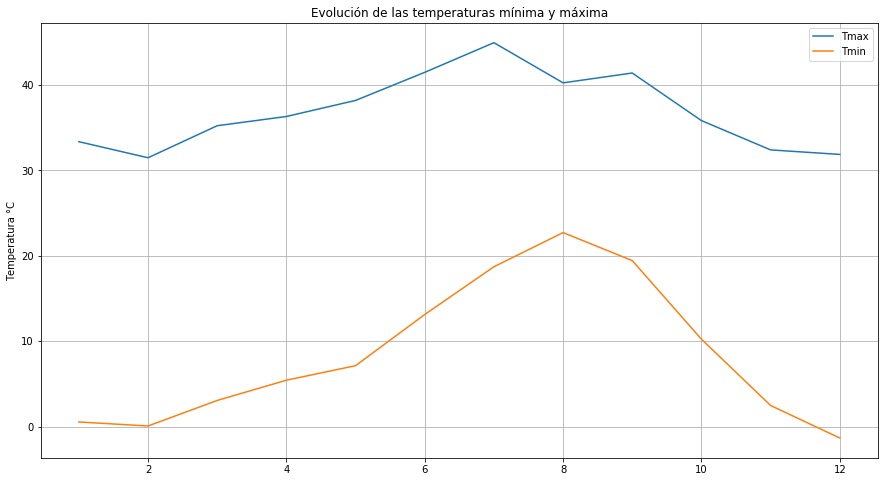

In [17]:
plt.figure(figsize=(15,8))

plt.plot(df.Mes, df.Tmax)
plt.plot(df.Mes, df.Tmin)
plt.title("Evolución de las temperaturas mínima y máxima")
plt.ylabel("Temperatura °C")
plt.gca().legend(('Tmax','Tmin'))
plt.grid(True)
plt.show()

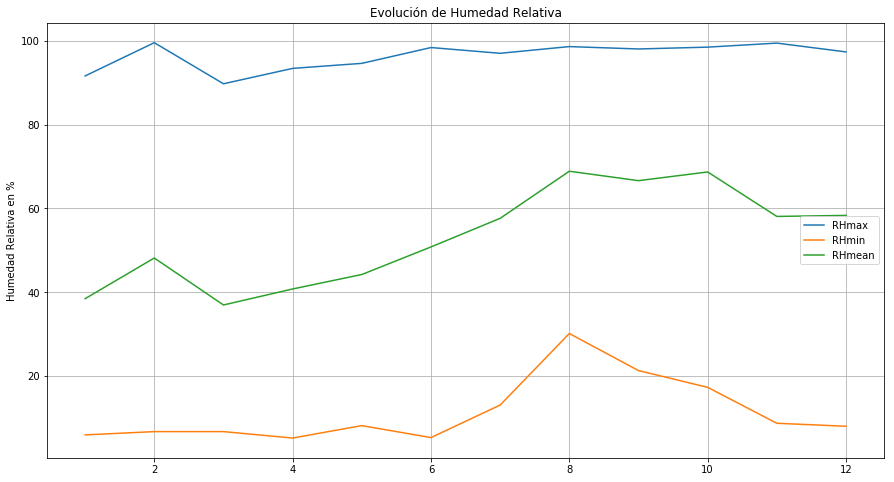

In [14]:
plt.figure(figsize=(15,8))

plt.plot(df.Mes, df.RHmax)
plt.plot(df.Mes, df.RHmin)
plt.plot(df.Mes, df.RHmean)
plt.title("Evolución de Humedad Relativa")
plt.ylabel("Humedad Relativa en %")
plt.gca().legend(('RHmax','RHmin', "RHmean"))
plt.grid(True)
plt.show()

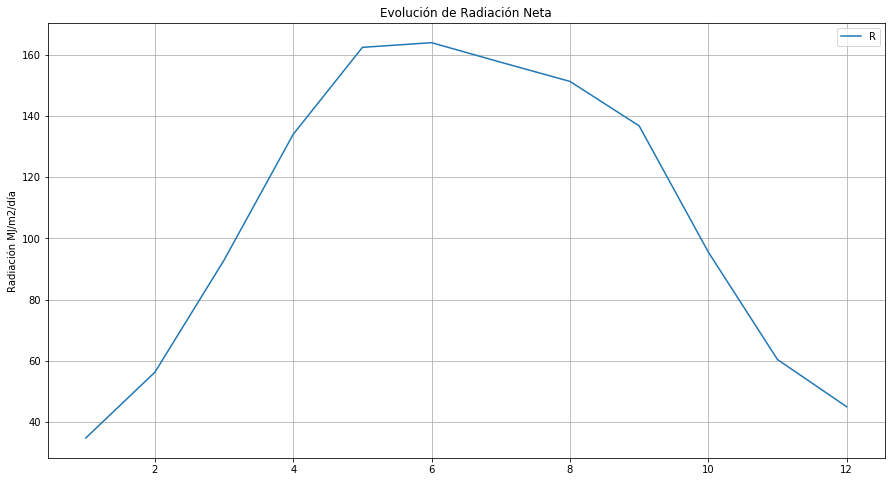

In [21]:
plt.figure(figsize=(15,8))

plt.plot(df.Mes, df.RadNet)
plt.title("Evolución de Radiación Neta")
plt.ylabel("Radiación MJ/m2/día")
plt.gca().legend(('RadNet'))
plt.grid(True)
plt.show()